## Diamond Price Predicator Using Linear Regression

## About Dataset
This is a dataset that includes 53,940 observations about the characteristics of each unique diamond, as well as the price.

* Carat- Carat weight of the diamond
* Cut - The cut rating of the diamond
* Color - The color rating of the diamond
* Clarity - The clarity rating of the diamond
* Table - The table width of the diamond
* Depth- The percentage of depth of the diamond
* Price - The price (in USD) of the diamond
* X- X dimension of the diamond
* Y- Y dimension of the diamond
* Z- Z dimension of the diamond

## Import Libraries

In [121]:
# for data preprocessing and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

## Load Dataset

In [86]:
df = pd.read_csv('diamonds.csv')

## Inspect Dataset

In [87]:
# first 5 observation
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [88]:
# last 5 observation
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [89]:
# sample record
df.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
7169,7170,0.91,Good,G,VS2,63.6,58.0,4183,6.14,6.10,3.89
40296,40297,0.40,Ideal,G,VS1,62.2,56.0,1125,4.74,4.72,2.94
24081,24082,1.56,Premium,D,SI1,62.6,58.0,12226,7.36,7.44,4.63
52726,52727,0.71,Ideal,I,VS1,62.2,54.0,2557,5.71,5.75,3.56
12516,12517,1.01,Very Good,H,VS2,63.1,59.0,5260,6.34,6.30,3.99


In [90]:
df.shape

(53940, 11)

* The Dataset contains 53,940 observations and 11 Features/Column

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


* There is no missing values in the dataset and all data types are appropriate
* Nevertheless, the is an Unnamed column that need to be remove

In [92]:
# remove unneccessary column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [93]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [94]:
# check for duplicates
df.duplicated().sum()

146

* The Dataset contains 146 duplicated observation, that has to be remove

In [95]:
# reomve duplicate
df.drop_duplicates(inplace=True)

In [96]:
df.duplicated().sum()

0

**Rename Columns**

In [97]:
df.rename(columns={"x":"x_dimension", "y":"y_dimension", "z":"z_dimension"}, inplace=True)

In [98]:
df.describe()

,carat,depth,table,price,x_dimension,y_dimension,z_dimension
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Exploratory Data Analysis

In [99]:
df.head()

,carat,cut,color,clarity,depth,table,price,x_dimension,y_dimension,z_dimension
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [100]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [101]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [102]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

## Univariate Analysis: Carat

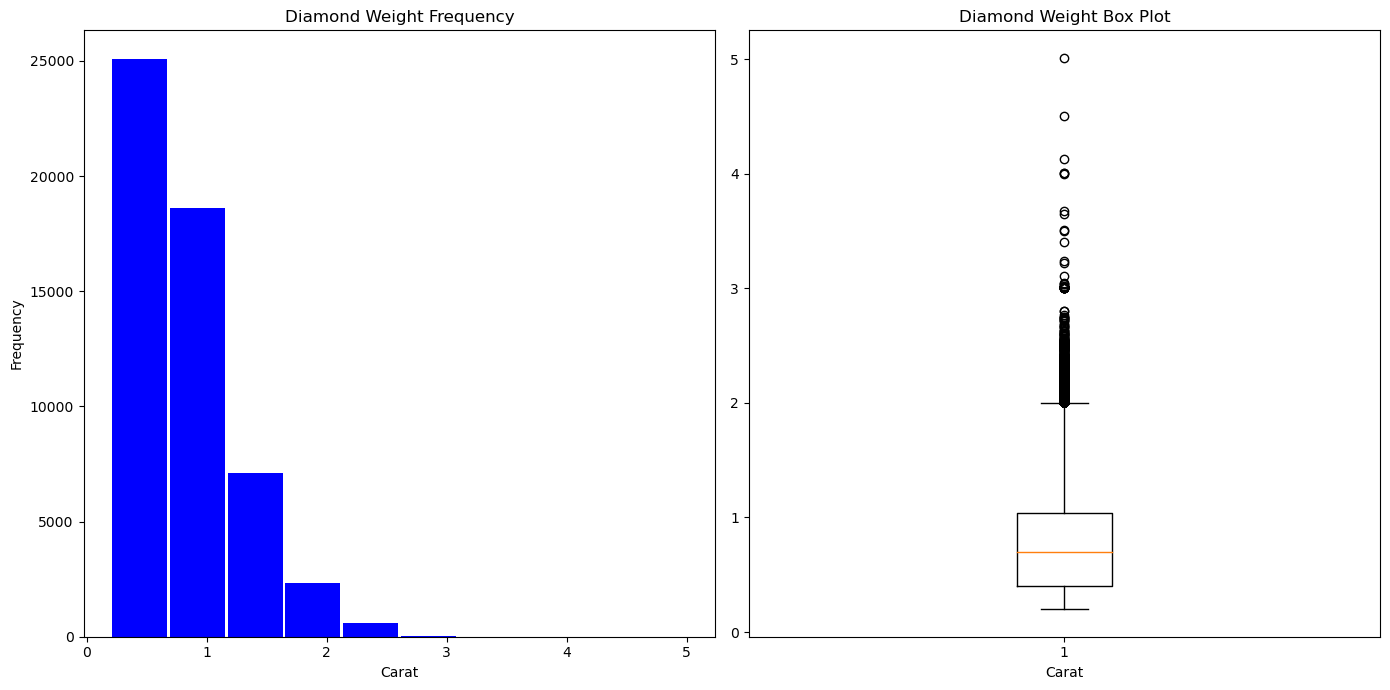

In [103]:
fig, ax = plt.subplots( ncols=2, figsize=(14, 7))

ax[0].hist(df['carat'], rwidth=0.95, color='blue')
ax[0].set_xlabel('Carat')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Diamond Weight Frequency')


ax[1].boxplot(df['carat'])
ax[1].set_xlabel('Carat')
ax[1].set_title('Diamond Weight Box Plot')

plt.tight_layout()
plt.show()

In [104]:
print(f"Mean: {df['carat'].mean():.3f}")
print(f"Mode: {df['carat'].mode().values[0]:.3f}")
print(f"Median: {df['carat'].median():.3f}")


Mean: 0.798
Mode: 0.300
Median: 0.700


**Observations**
* The Histrogram above shows that the distribution of carat feature of the dataset, we can say that the distribution is likely skewed to the right (positively skewed). This is because the mean `(0.798)` is larger than the median `(0.700)`, and the mode `(0.300)` is smaller than both.. To ensure that the machine learning model capabilities is not affected, skewed data has to be transformed to approximate to a normal distribution.

* The Box Plot shows that the features contains some outliers.

## Univariate Analysis: Depth

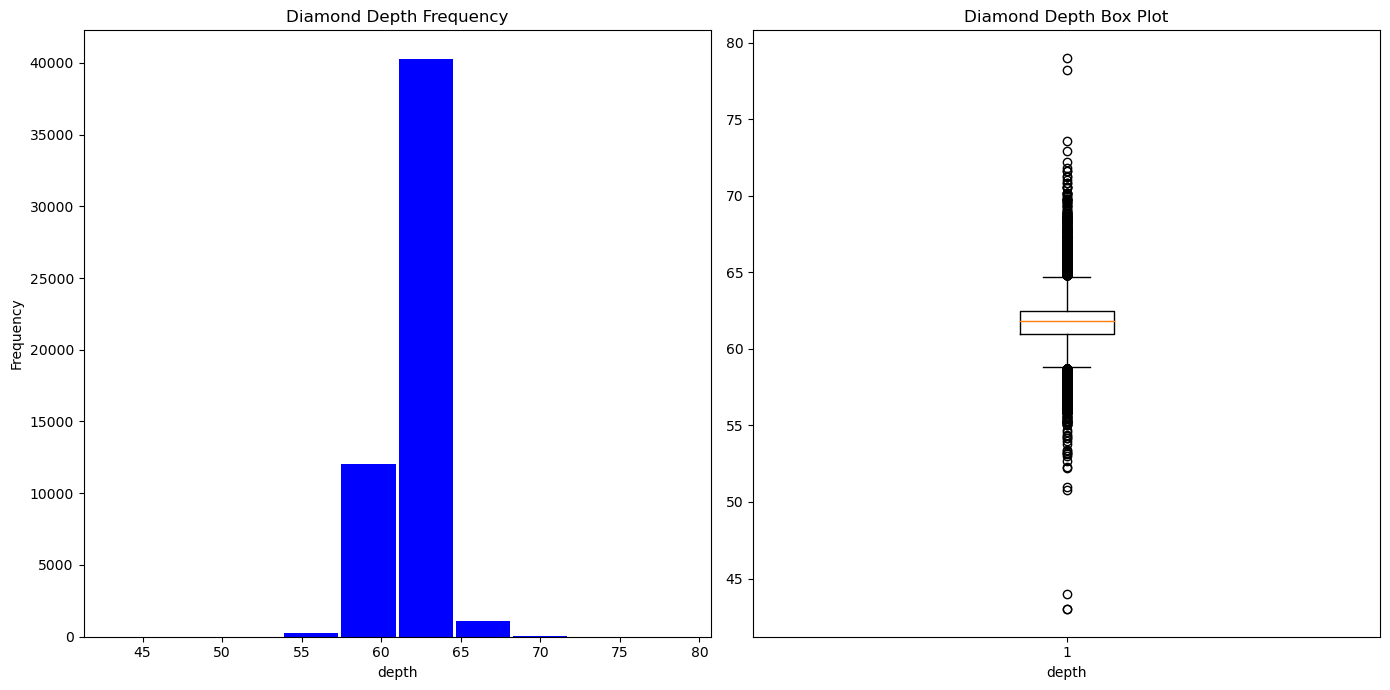

In [105]:
fig, ax = plt.subplots( ncols=2, figsize=(14, 7))

ax[0].hist(df['depth'], rwidth=0.95, color='blue')
ax[0].set_xlabel('depth')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Diamond Depth Frequency')

ax[1].boxplot(df['depth'])
ax[1].set_xlabel('depth')
ax[1].set_title('Diamond Depth Box Plot')

plt.tight_layout()
plt.show()

In [106]:
print(f"Mean: {df['depth'].mean():.3f}")
print(f"Mode: {df['depth'].mode().values[0]:.3f}")
print(f"Median: {df['depth'].median():.3f}")

Mean: 61.748
Mode: 62.000
Median: 61.800


**Observations**
* We can interpret the distribution as being relatively symmetric around the mode (62.000) and the median (61.800) is close to the mode as well. This suggests that the data is likely to be normally distributed or approximately normal. The mean being close to the mode and median further supports this interpretation.

* In summary, the distribution appears to be relatively symmetrical and centered around the mode, with the mean and median being very close to the mode. This suggests that the data follows a roughly normal distribution.

## Univariate Analysis: Table

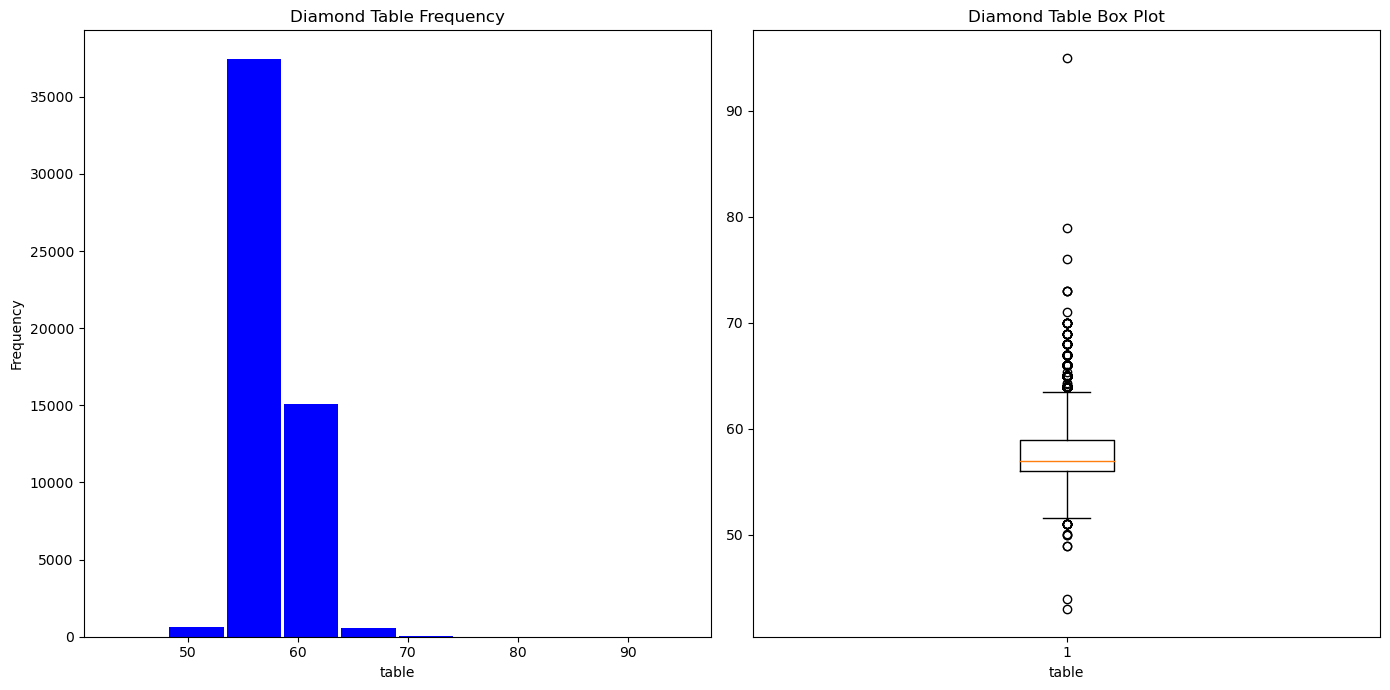

In [107]:
fig, ax = plt.subplots( ncols=2, figsize=(14, 7))

ax[0].hist(df['table'], rwidth=0.95, color='blue')
ax[0].set_xlabel('table')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Diamond Table Frequency')

ax[1].boxplot(df['table'])
ax[1].set_xlabel('table')
ax[1].set_title('Diamond Table Box Plot')

plt.tight_layout()
plt.show()

In [108]:
print(f"Mean: {df['table'].mean():.3f}")
print(f"Mode: {df['table'].mode().values[0]:.3f}")
print(f"Median: {df['table'].median():.3f}")

Mean: 57.458
Mode: 56.000
Median: 57.000


**Observation**
* we can infer that the distribution is slightly positively skewed, with the mean being slightly greater than the median. The mode being lower than the mean and median suggests that there might be a concentration of values around 56.000, but the mean being greater indicates that there are also some higher values pulling the average up. Overall, the distribution appears to be somewhat symmetrical around the median, with a slight right skew.

## Univariate Analysis: Price

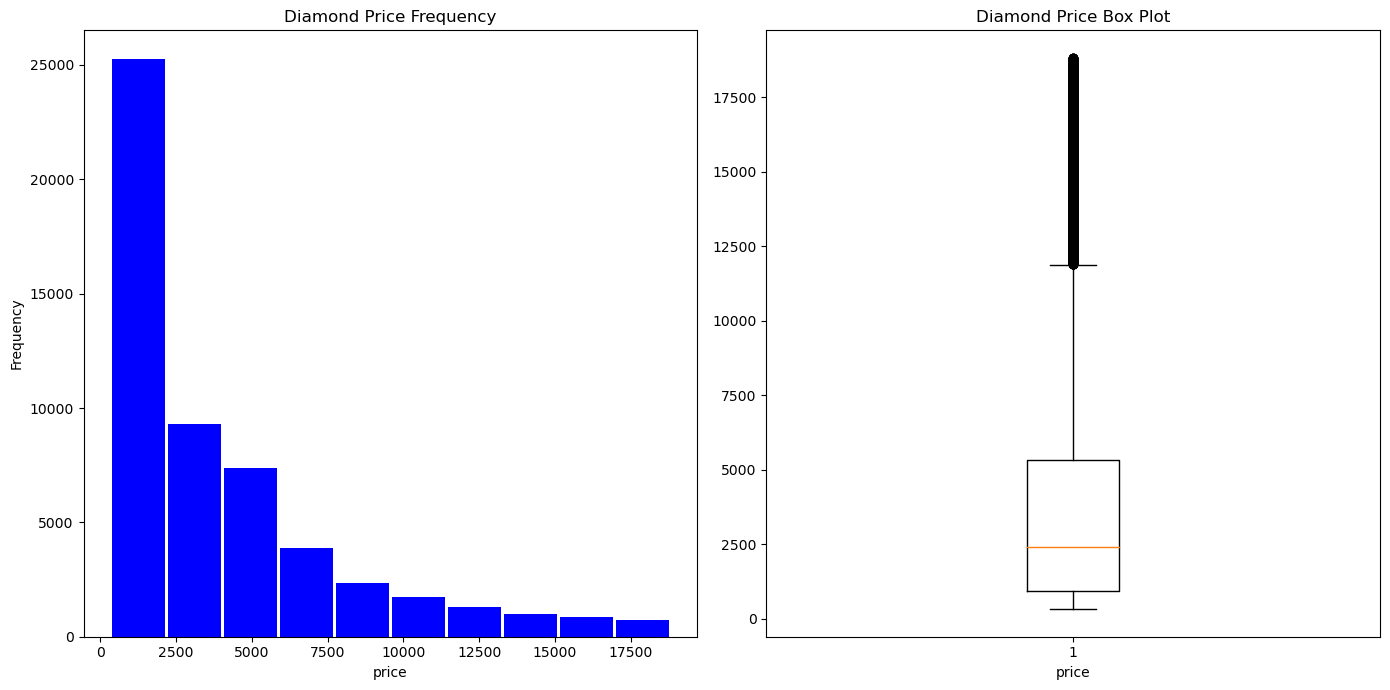

In [109]:
fig, ax = plt.subplots( ncols=2, figsize=(14, 7))

ax[0].hist(df['price'], rwidth=0.95, color='blue')
ax[0].set_xlabel('price')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Diamond Price Frequency')

ax[1].boxplot(df['price'])
ax[1].set_xlabel('price')
ax[1].set_title('Diamond Price Box Plot')

plt.tight_layout()
plt.show()

In [110]:
print(f"Mean: {df['price'].mean():.3f}")
print(f"Mode: {df['price'].mode().values[0]:.3f}")
print(f"Median: {df['price'].median():.3f}")

Mean: 3933.065
Mode: 605.000
Median: 2401.000


**Observations**
we can infer that the distribution of prices is likely skewed to the right, with a long tail of higher values. The mean being larger than the median suggests that there are some higher-priced outliers pulling the mean upward. The mode being much lower than the mean and median indicates that there is a concentration of lower-priced items in the dataset, with a few higher-priced items driving up the mean.

## Univariate Analysis: X_dimension

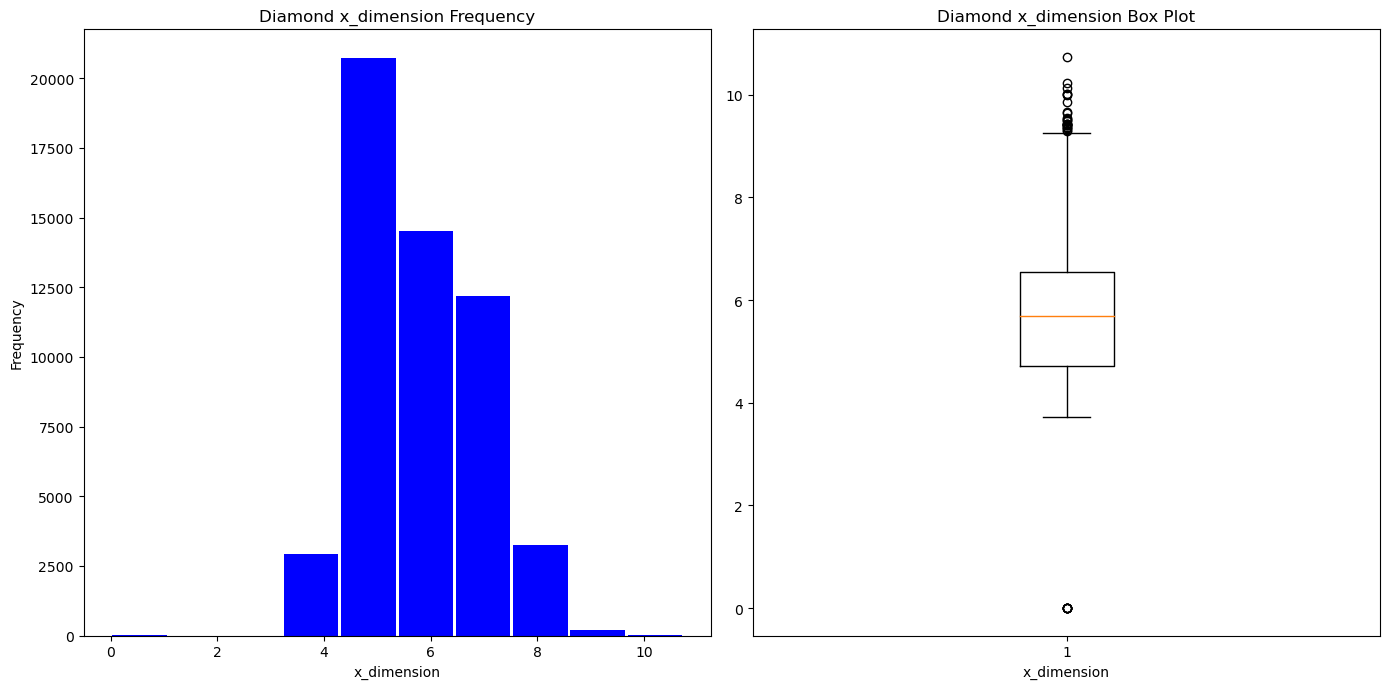

In [112]:
fig, ax = plt.subplots( ncols=2, figsize=(14, 7))

ax[0].hist(df['x_dimension'], rwidth=0.95, color='blue')
ax[0].set_xlabel('x_dimension')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Diamond x_dimension Frequency')

ax[1].boxplot(df['x_dimension'])
ax[1].set_xlabel('x_dimension')
ax[1].set_title('Diamond x_dimension Box Plot')

plt.tight_layout()
plt.show()

In [113]:
print(f"Mean: {df['x_dimension'].mean():.3f}")
print(f"Mode: {df['x_dimension'].mode().values[0]:.3f}")
print(f"Median: {df['x_dimension'].median():.3f}")

Mean: 5.731
Mode: 4.370
Median: 5.700


**Observations**
* The distribution of the X dimension of the diamonds appears to be slightly right-skewed, with a peak around `4.370` and a central tendency indicated by the mean and median values.

## Univariate Analysis: Y_dimension

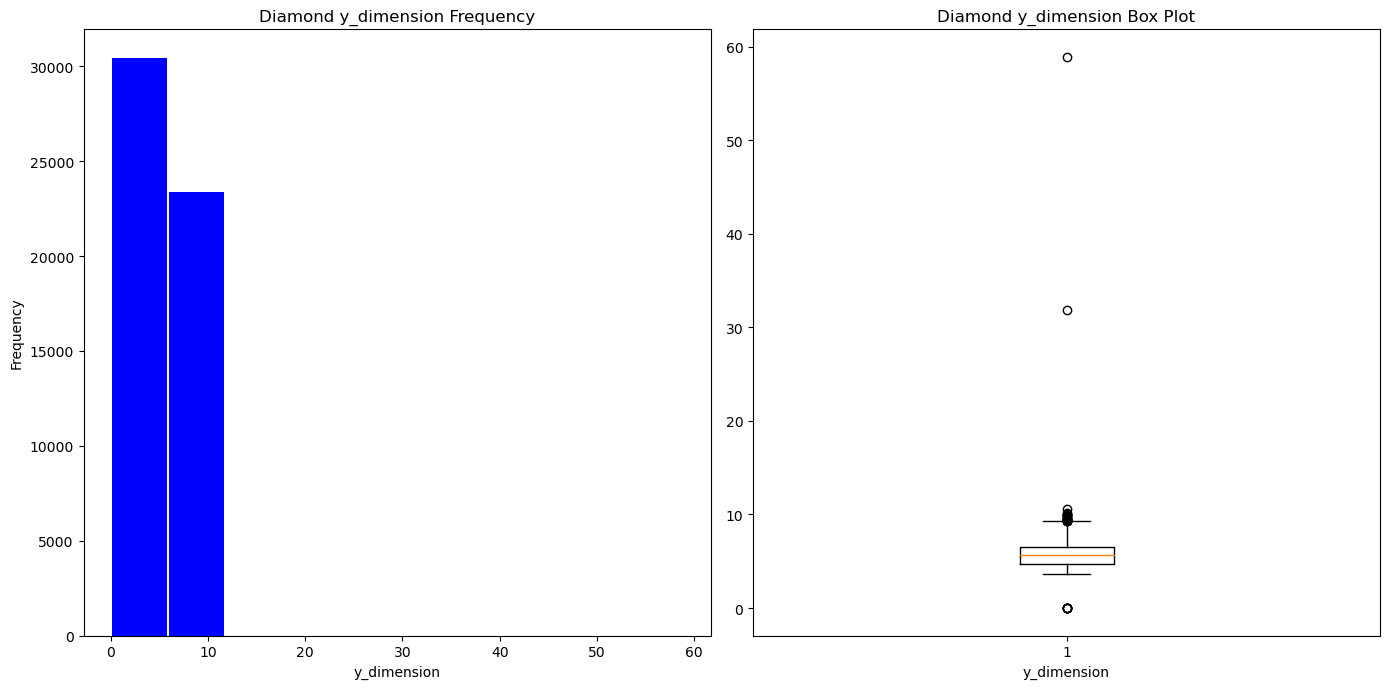

In [114]:
fig, ax = plt.subplots( ncols=2, figsize=(14, 7))

ax[0].hist(df['y_dimension'], rwidth=0.95, color='blue')
ax[0].set_xlabel('y_dimension')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Diamond y_dimension Frequency')

ax[1].boxplot(df['y_dimension'])
ax[1].set_xlabel('y_dimension')
ax[1].set_title('Diamond y_dimension Box Plot')

plt.tight_layout()
plt.show()

In [115]:
print(f"Mean: {df['y_dimension'].mean():.3f}")
print(f"Mode: {df['y_dimension'].mode().values[0]:.3f}")
print(f"Median: {df['y_dimension'].median():.3f}")

Mean: 5.735
Mode: 4.340
Median: 5.710


**Observations**
* The distribution of the Y dimension of the diamonds seems to be slightly skewed to the right, with a longer tail on the right side of the distribution. This suggests that while the majority of diamonds cluster around the mode and median values, there are also some diamonds with higher Y dimensions, pulling the mean value slightly higher

## Univariate Analysis: Z_dimension

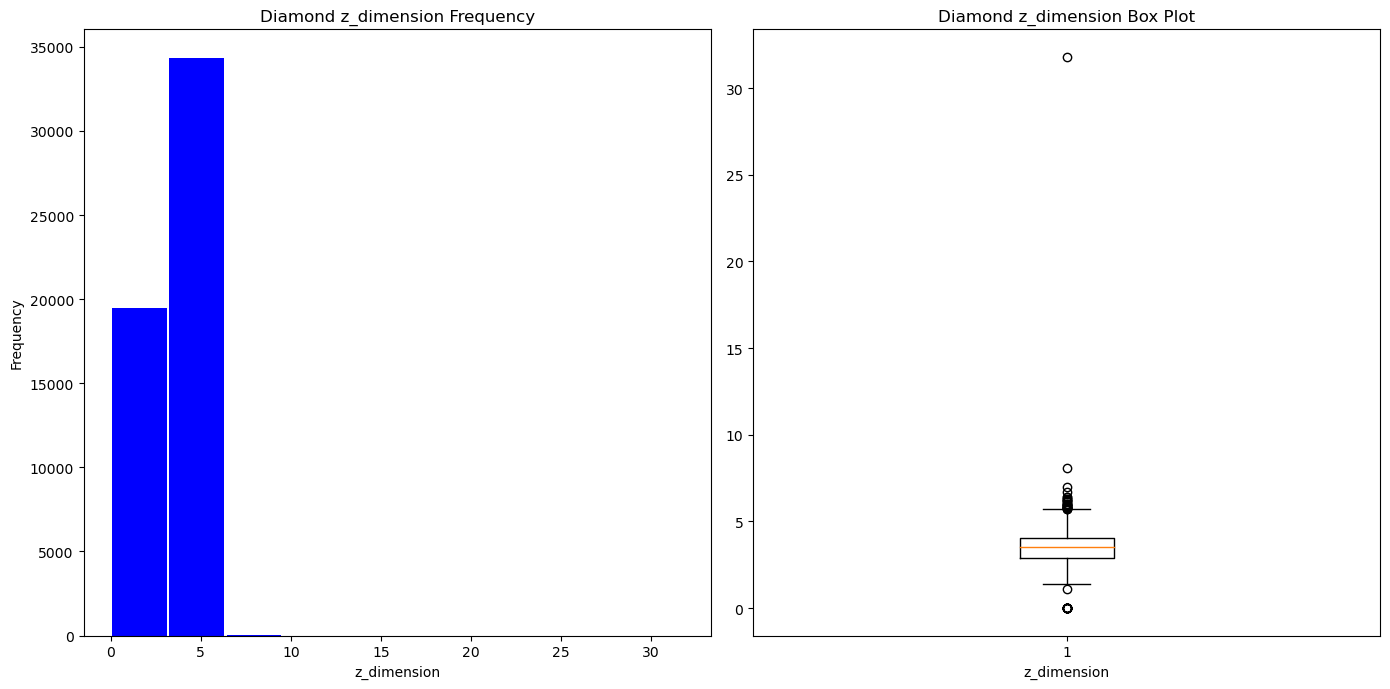

In [116]:
fig, ax = plt.subplots( ncols=2, figsize=(14, 7))

ax[0].hist(df['z_dimension'], rwidth=0.95, color='blue')
ax[0].set_xlabel('z_dimension')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Diamond z_dimension Frequency')

ax[1].boxplot(df['z_dimension'])
ax[1].set_xlabel('z_dimension')
ax[1].set_title('Diamond z_dimension Box Plot')

plt.tight_layout()
plt.show()

In [117]:
print(f"Mean: {df['z_dimension'].mean():.3f}")
print(f"Mode: {df['z_dimension'].mode().values[0]:.3f}")
print(f"Median: {df['z_dimension'].median():.3f}")

Mean: 3.539
Mode: 2.700
Median: 3.530


**Observations**
* Considering these statistics, we can infer that the distribution of the Z dimension of the diamonds is somewhat skewed, with a noticeable concentration of diamonds around the mode value `(2.700)`. However, the mean and median values being close indicate that the skewness might not be extreme. This distribution shape could potentially be asymmetric, with a tail towards higher values, depending on the specific spread and shape of the data around the mode.

## Bivariate Analysis

## Cutting Count

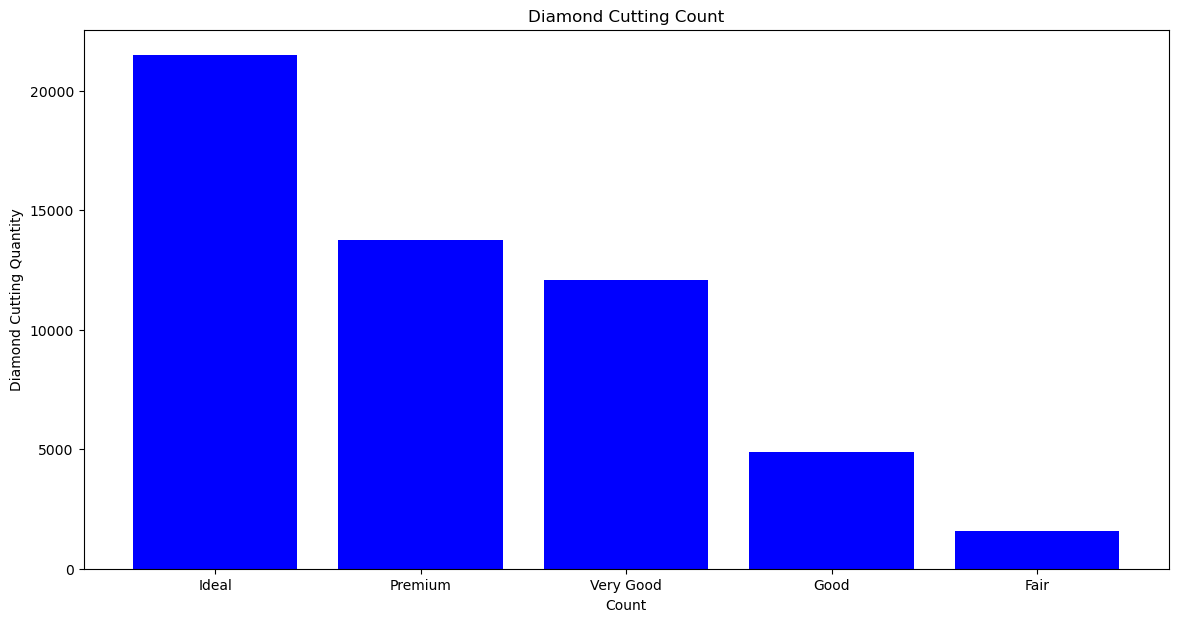

In [118]:
cut = df['cut'].value_counts()
fig, ax = plt.subplots(figsize=(14, 7))

ax.bar(cut.index, cut ,color='blue')
ax.set_xlabel('Count')
ax.set_ylabel('Diamond Cutting Quantity')
ax.set_title('Diamond Cutting Count')
plt.show()

## Color Count

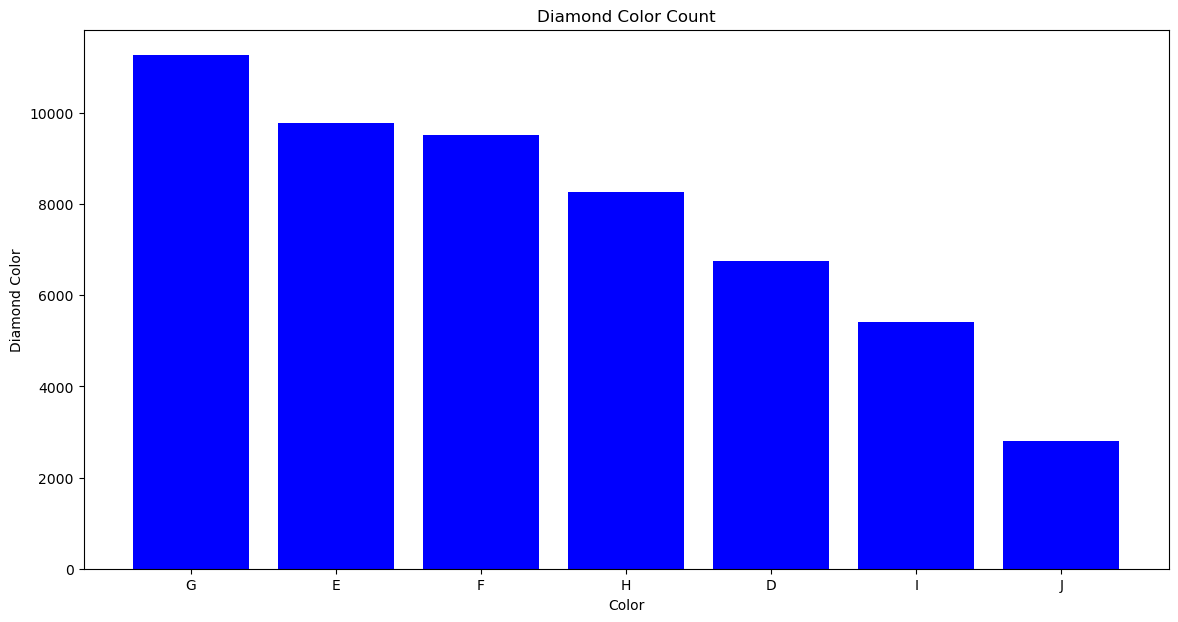

In [108]:
color = df['color'].value_counts()
fig, ax = plt.subplots(figsize=(14, 7))

ax.bar(color.index, color ,color='blue')
ax.set_xlabel('Color')
ax.set_ylabel('Diamond Color')
ax.set_title('Diamond Color Count')
plt.show()

## Clarity Count

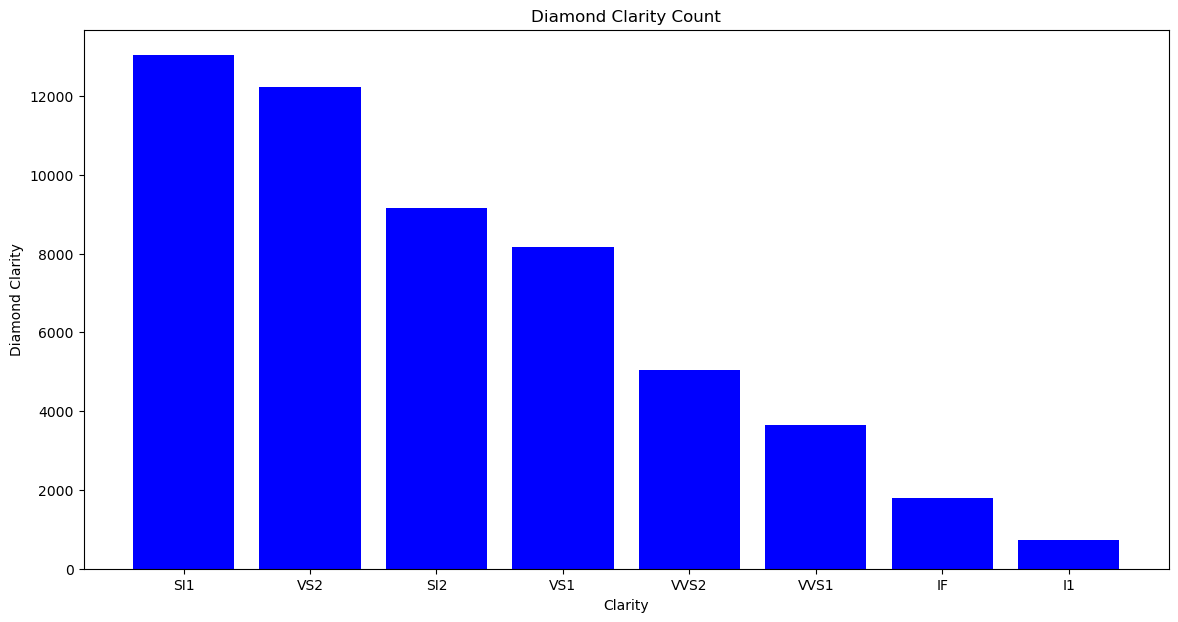

In [109]:
clarity = df['clarity'].value_counts()
fig, ax = plt.subplots(figsize=(14, 7))

ax.bar(clarity.index, clarity ,color='blue')
ax.set_xlabel('Clarity')
ax.set_ylabel('Diamond Clarity')
ax.set_title('Diamond Clarity Count')
plt.show()

## Correllation: Carat VS Price

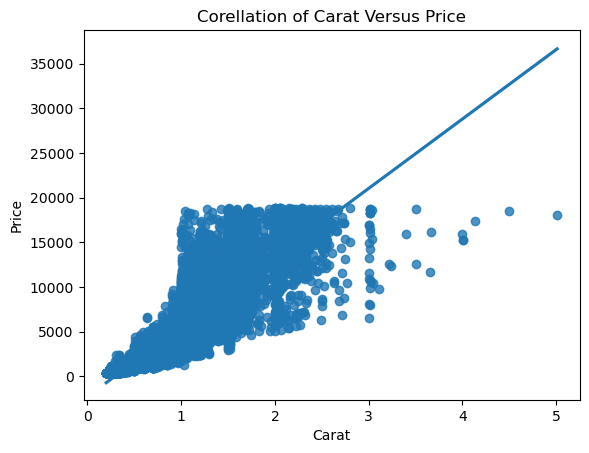

In [119]:
sns.regplot(data=df, x=df['carat'], y=df['price'])
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Corellation of Carat Versus Price")
plt.show()

## Other Features

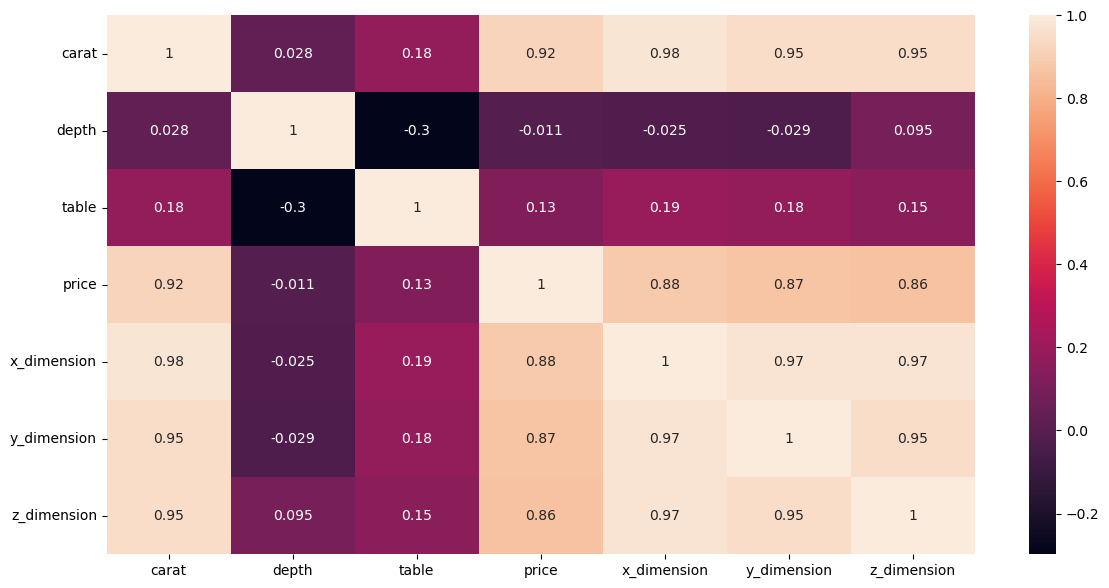

In [120]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(data=df.corr(numeric_only=True), annot=True)
plt.show()

## Building Machine Learning Model

## Data Split

* X -> Independent Features
* y -> Dependent Features

In [125]:
X = df.drop(columns=['price'])
y = df['price']

## Perform Label Encoder on "cut" and "color"

In [129]:

cut_dummy = pd.get_dummies(X['cut'])
color_dummy = pd.get_dummies(X['color'])
clarity_dummy = pd.get_dummies(X['clarity'])

# concatenate the dummy with the X 

X = pd.concat([X, cut_dummy, color_dummy, clarity_dummy], axis=1)


# remove columns: cut, color, clarity
X.drop(columns=['cut', 'color', 'clarity'], inplace=True)

## Data Normalization

In [141]:
# normalize the features (scale them to have zero mean and unit variance)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [143]:
# convert the normalized features to a DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)
X_normalized_df.head()

,carat,depth,table,x_dimension,y_dimension,z_dimension,Fair,Good,Ideal,Premium,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,-1.199402,-0.173495,-1.100486,-1.589399,-1.537553,-1.572574,-0.174972,-0.316250,1.226150,-0.585923,...,-0.334283,-0.234414,-0.118102,-0.185206,-0.565429,2.208874,-0.422742,-0.542415,-0.269678,-0.322084
1,-1.241651,-1.362393,1.585691,-1.642938,-1.660231,-1.742780,-0.174972,-0.316250,-0.815561,1.706710,...,-0.334283,-0.234414,-0.118102,-0.185206,1.768570,-0.452719,-0.422742,-0.542415,-0.269678,-0.322084
2,-1.199402,-3.390512,3.376475,-1.500168,-1.458689,-1.742780,-0.174972,3.162051,-0.815561,-0.585923,...,-0.334283,-0.234414,-0.118102,-0.185206,-0.565429,-0.452719,2.365509,-0.542415,-0.269678,-0.322084
3,-1.072656,0.455922,0.242603,-1.366321,-1.318485,-1.288899,-0.174972,-0.316250,-0.815561,1.706710,...,2.991480,-0.234414,-0.118102,-0.185206,-0.565429,-0.452719,-0.422742,1.843607,-0.269678,-0.322084
4,-1.030407,1.085338,0.242603,-1.241397,-1.213332,-1.118694,-0.174972,3.162051,-0.815561,-0.585923,...,-0.334283,4.265962,-0.118102,-0.185206,-0.565429,2.208874,-0.422742,-0.542415,-0.269678,-0.322084


## Train Test Split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=0)

## Linear Regression

In [147]:
lreg_model = LinearRegression()

In [151]:
lreg_model.fit(X_train, y_train)
lreg_predict = lreg_model.predict(X_test)

rmse = mean_squared_error(y_test, lreg_predict)
r2 = r2_score(y_test, lreg_predict)

N = X_test.shape[0]
P = X_test.shape[1]
r2_adjusted = 1 - ((1 - r2) * (N - 1)) / (N - P - 1)

print(f"RMSE : {rmse:.3f}")
print(f"R2 : {r2:.3f}")
print(f"R2_adjusted : {r2_adjusted:.3f}")

RMSE : 1280302.909
R2 : 0.920
R2_adjusted : 0.919


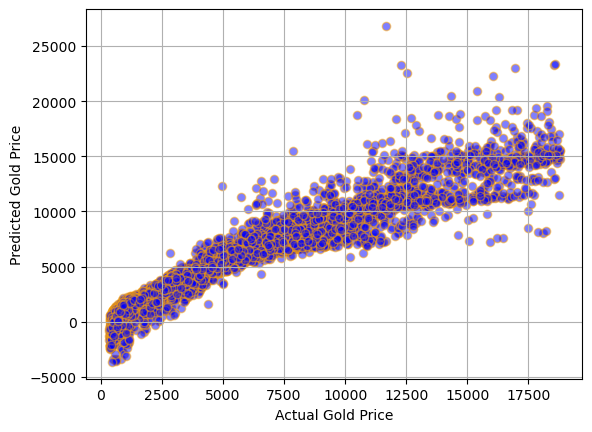

In [153]:
plt.scatter(y_test, lreg_predict, edgecolors='orange', alpha=0.5, color='blue')
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price")
plt.grid()
plt.show()

RMSE : 1280220.409
R2 : 0.920
R2_adjusted : 0.920


## Ridge

In [130]:
ridge_model = Ridge(alpha=.5)

ridge_model.fit(X_train, y_train)

Ridge(alpha=0.5)

In [131]:
# make prediction using the X_test
ridge_pred = ridge_model.predict(X_test)
ridge_pred

array([-313.35829967, 6100.97936762, 1959.97657363, ..., 4766.08437379,
       3929.08311849, 2040.41452807])

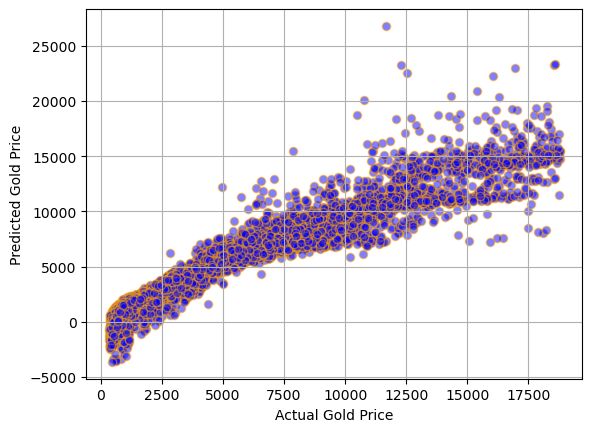

In [132]:
plt.scatter(y_test, ridge_pred, edgecolors='orange', alpha=0.5, color='blue')
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price")
plt.grid()
plt.show()

## Lasso: L1 Regularization

In [159]:
lasso_model = Lasso(alpha=.5)

lasso_model.fit(X_train, y_train)
# make prediction using the X_test
lasso_predict = lasso_model.predict(X_test)

rmse = mean_squared_error(y_test, lasso_predict)
r2 = r2_score(y_test, lasso_predict)

N = X_test.shape[0]
P = X_test.shape[1]
r2_adjusted = 1 - ((1 - r2) * (N - 1)) / (N - P - 1)

print(f"RMSE : {rmse:.3f}")
print(f"R2 : {r2:.3f}")
print(f"R2_adjusted : {r2_adjusted:.3f}")


RMSE : 1280348.440
R2 : 0.920
R2_adjusted : 0.919


## Ridge: L2 Regularization

In [158]:
ridge_model = Ridge(alpha=.5)

ridge_model.fit(X_train, y_train)
# make prediction using the X_test
ridge_predict = ridge_model.predict(X_test)
rmse = mean_squared_error(y_test, ridge_predict)
r2 = r2_score(y_test, ridge_predict)

N = X_test.shape[0]
P = X_test.shape[1]
r2_adjusted = 1 - ((1 - r2) * (N - 1)) / (N - P - 1)

print(f"RMSE : {rmse:.3f}")
print(f"R2 : {r2:.3f}")
print(f"R2_adjusted : {r2_adjusted:.3f}")

RMSE : 1280229.775
R2 : 0.920
R2_adjusted : 0.919


## Save Model

In [160]:
import pickle

# save the diamond Linear Regression model as a pickle file
with open('diamond_linear_model.pickle', 'wb') as file:
    pickle.dump(lreg_model, file)

## Thank you

##